In [1]:
import numpy as np
import matplotlib.pyplot as plt

from TidalPy.RadialSolver import radial_solver
from TidalPy.utilities.spherical_helper import calculate_mass_gravity_arrays

In [2]:
# recreate results of Guo+2004
# uses PREM model of earth with averaged continental and ocean crust
# LNs taken from table 1 of Guo+2004 GJI

r = np.array([1.0000e+00, 1.0100e+02, 2.0100e+02, 3.0100e+02, 4.0100e+02,
       5.0100e+02, 6.0100e+02, 7.0100e+02, 8.0100e+02, 9.0100e+02,
       1.0010e+03, 1.1010e+03, 1.2010e+03, 1.2181e+03, 1.2225e+03,
       1.2225e+03, 1.3010e+03, 1.4010e+03, 1.5010e+03, 1.6010e+03,
       1.7010e+03, 1.8010e+03, 1.9010e+03, 2.0010e+03, 2.1010e+03,
       2.2010e+03, 2.2225e+03, 2.3010e+03, 2.4010e+03, 2.5010e+03,
       2.6010e+03, 2.7010e+03, 2.8010e+03, 2.9010e+03, 3.0010e+03,
       3.1010e+03, 3.2010e+03, 3.3010e+03, 3.4010e+03, 3.4810e+03,
       3.4810e+03, 3.4867e+03, 3.5367e+03, 3.5867e+03, 3.6310e+03,
       3.6310e+03, 3.6367e+03, 3.6867e+03, 3.7367e+03, 3.7867e+03,
       3.8367e+03, 3.8867e+03, 3.9367e+03, 3.9867e+03, 4.0367e+03,
       4.0867e+03, 4.1367e+03, 4.1867e+03, 4.2367e+03, 4.2867e+03,
       4.3367e+03, 4.3867e+03, 4.4367e+03, 4.4867e+03, 4.5367e+03,
       4.5867e+03, 4.6367e+03, 4.6867e+03, 4.7367e+03, 4.7867e+03,
       4.8367e+03, 4.8867e+03, 4.9367e+03, 4.9867e+03, 5.0367e+03,
       5.0867e+03, 5.1367e+03, 5.1867e+03, 5.2367e+03, 5.2867e+03,
       5.3367e+03, 5.3867e+03, 5.4367e+03, 5.4867e+03, 5.5367e+03,
       5.5867e+03, 5.6010e+03, 5.6010e+03, 5.6367e+03, 5.6867e+03,
       5.7020e+03, 5.7020e+03, 5.7120e+03, 5.7220e+03, 5.7320e+03,
       5.7420e+03, 5.7520e+03, 5.7620e+03, 5.7720e+03, 5.7720e+03,
       5.7820e+03, 5.7920e+03, 5.8020e+03, 5.8120e+03, 5.8220e+03,
       5.8320e+03, 5.8420e+03, 5.8520e+03, 5.8620e+03, 5.8720e+03,
       5.8820e+03, 5.8920e+03, 5.9020e+03, 5.9120e+03, 5.9220e+03,
       5.9320e+03, 5.9420e+03, 5.9520e+03, 5.9620e+03, 5.9720e+03,
       5.9720e+03, 5.9820e+03, 5.9920e+03, 6.0020e+03, 6.0120e+03,
       6.0220e+03, 6.0320e+03, 6.0420e+03, 6.0520e+03, 6.0620e+03,
       6.0720e+03, 6.0820e+03, 6.0920e+03, 6.1020e+03, 6.1120e+03,
       6.1220e+03, 6.1320e+03, 6.1420e+03, 6.1520e+03, 6.1520e+03,
       6.1620e+03, 6.1720e+03, 6.1820e+03, 6.1920e+03, 6.2020e+03,
       6.2120e+03, 6.2220e+03, 6.2320e+03, 6.2420e+03, 6.2520e+03,
       6.2620e+03, 6.2720e+03, 6.2820e+03, 6.2920e+03, 6.2920e+03,
       6.3020e+03, 6.3120e+03, 6.3220e+03, 6.3270e+03, 6.3320e+03,
       6.3370e+03, 6.3380e+03, 6.3390e+03, 6.3400e+03, 6.3410e+03,
       6.3420e+03, 6.3430e+03, 6.3440e+03, 6.3450e+03, 6.3460e+03,
       6.3470e+03, 6.3476e+03, 6.3476e+03, 6.3490e+03, 6.3500e+03,
       6.3510e+03, 6.3520e+03, 6.3530e+03, 6.3540e+03, 6.3550e+03,
       6.3560e+03, 6.3570e+03, 6.3570e+03, 6.3580e+03, 6.3590e+03,
       6.3600e+03, 6.3610e+03, 6.3620e+03, 6.3630e+03, 6.3640e+03,
       6.3650e+03, 6.3660e+03, 6.3670e+03, 6.3680e+03, 6.3690e+03,
       6.3690e+03, 6.3700e+03, 6.3710e+03])

vp = np.array([11.2622 , 11.26063, 11.25593, 11.24809, 11.23711, 11.223  ,
       11.20576, 11.18537, 11.16186, 11.1352 , 11.10541, 11.07249,
       11.03642, 11.02994, 11.02826, 10.35572, 10.30975, 10.24963,
       10.18747, 10.12295, 10.05576,  9.98558,  9.9121 ,  9.835  ,
        9.75397,  9.66869,  9.64977,  9.57885,  9.48413,  9.38422,
        9.2788 ,  9.16756,  9.05019,  8.92636,  8.79577,  8.65809,
        8.51302,  8.36024,  8.19943,  8.06479, 13.71662, 13.71522,
       13.70302, 13.69098, 13.68044, 13.68042, 13.6735 , 13.61313,
       13.55341, 13.49426, 13.4356 , 13.37735, 13.31944, 13.26179,
       13.20432, 13.14696, 13.08963, 13.03224, 12.97473, 12.91702,
       12.85902, 12.80067, 12.74188, 12.68258, 12.62269, 12.56213,
       12.50083, 12.4387 , 12.37567, 12.31167, 12.24662, 12.18043,
       12.11304, 12.04435, 11.97431, 11.90283, 11.82983, 11.75523,
       11.67896, 11.60095, 11.5211 , 11.43936, 11.35563, 11.26984,
       11.18192, 11.09179, 11.06559, 11.0656 , 10.95459, 10.79897,
       10.75132, 10.26617, 10.25069, 10.2352 , 10.21971, 10.20422,
       10.18874, 10.17325, 10.15776, 10.15783, 10.10663, 10.05543,
       10.00424,  9.95304,  9.90185,  9.85065,  9.79946,  9.74826,
        9.69707,  9.64587,  9.59468,  9.54348,  9.49228,  9.44109,
        9.38989,  9.3387 ,  9.2875 ,  9.23631,  9.18511,  9.13392,
        8.90524,  8.886  ,  8.86677,  8.84753,  8.82829,  8.80905,
        8.78981,  8.77057,  8.75133,  8.7321 ,  8.71286,  8.69362,
        8.67438,  8.65514,  8.6359 ,  8.61666,  8.59743,  8.57819,
        7.98971,  7.98971,  7.99589,  8.00207,  8.00825,  8.01443,
        8.02062,  8.0268 ,  8.03298,  8.03916,  8.04534,  8.05152,
        8.0577 ,  8.06389,  8.07007,  8.07625,  8.07625,  8.08243,
        8.08861,  8.09479,  8.09788,  8.10097,  8.10406,  8.10468,
        8.1053 ,  8.10592,  8.10654,  8.10716,  8.10777,  8.10839,
        8.10901,  8.10963,  8.11025,  8.11062,  6.8    ,  6.8    ,
        6.8    ,  6.8    ,  6.8    ,  6.8    ,  6.8    ,  6.8    ,
        6.8    ,  6.8    ,  6.18904,  6.18904,  6.18904,  6.18904,
        6.18904,  6.18904,  6.18904,  6.18904,  6.18904,  6.18904,
        6.18904,  6.18904,  6.18904,  6.18904,  6.18904,  6.18904])

vs = np.array([3.6678 , 3.6667 , 3.66342, 3.65794, 3.65027, 3.64041, 3.62835,
       3.61411, 3.59767, 3.57905, 3.55823, 3.53522, 3.51002, 3.50549,
       3.50431, 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.     , 0.     , 7.26465, 7.26471,
       7.2652 , 7.26563, 7.26597, 7.26593, 7.26331, 7.24048, 7.21781,
       7.19529, 7.17287, 7.15055, 7.12828, 7.10605, 7.08382, 7.06157,
       7.03927, 7.0169 , 6.99442, 6.97182, 6.94906, 6.92611, 6.90296,
       6.87957, 6.85592, 6.83197, 6.80771, 6.78311, 6.75813, 6.73276,
       6.70696, 6.68071, 6.65398, 6.62674, 6.59897, 6.57064, 6.54173,
       6.5122 , 6.48204, 6.4512 , 6.41967, 6.38742, 6.35442, 6.32065,
       6.28608, 6.25067, 6.24039, 6.24054, 6.13609, 5.98986, 5.94513,
       5.57021, 5.56247, 5.55473, 5.54699, 5.53924, 5.5315 , 5.52376,
       5.51602, 5.51593, 5.48676, 5.45759, 5.42841, 5.39924, 5.37007,
       5.3409 , 5.31173, 5.28255, 5.25338, 5.22421, 5.19504, 5.16586,
       5.13669, 5.10752, 5.07835, 5.04918, 5.02   , 4.99083, 4.96166,
       4.93249, 4.7699 , 4.7629 , 4.7559 , 4.7489 , 4.7419 , 4.7349 ,
       4.7279 , 4.7209 , 4.7139 , 4.7069 , 4.6999 , 4.6929 , 4.6859 ,
       4.6789 , 4.6719 , 4.6649 , 4.6579 , 4.6509 , 4.41892, 4.41892,
       4.4226 , 4.42629, 4.42997, 4.43366, 4.43734, 4.44103, 4.44472,
       4.4484 , 4.45209, 4.45577, 4.45946, 4.46314, 4.46683, 4.47052,
       4.47052, 4.4742 , 4.47789, 4.48157, 4.48341, 4.48526, 4.4871 ,
       4.48747, 4.48784, 4.48821, 4.48857, 4.48894, 4.48931, 4.48968,
       4.49005, 4.49042, 4.49079, 4.49101, 3.9    , 3.9    , 3.9    ,
       3.9    , 3.9    , 3.9    , 3.9    , 3.9    , 3.9    , 3.9    ,
       3.41464, 3.41464, 3.41464, 3.41464, 3.41464, 3.41464, 3.41464,
       3.41464, 3.41464, 3.41464, 3.41464, 3.41464, 3.41464, 3.41464,
       3.41464, 3.41464])

rho = np.array([13.0885 , 13.08632, 13.07979, 13.0689 , 13.05366, 13.03406,
       13.01011, 12.98181, 12.94914, 12.91213, 12.87076, 12.82503,
       12.77495, 12.76595, 12.76361, 12.16633, 12.12499, 12.06923,
       12.00988, 11.94681, 11.87989, 11.809  , 11.73401, 11.65478,
       11.57119, 11.48311, 11.46358, 11.39042, 11.29298, 11.19067,
       11.08336, 10.97092, 10.85322, 10.73013, 10.60153, 10.46729,
       10.32727, 10.18136, 10.02942,  9.90344,  5.56646,  5.5636 ,
        5.53856,  5.51358,  5.49148,  5.49148,  5.48863,  5.46372,
        5.43883,  5.41395,  5.38908,  5.3642 ,  5.33931,  5.3144 ,
        5.28945,  5.26447,  5.23944,  5.21434,  5.18919,  5.16395,
        5.13863,  5.11322,  5.0877 ,  5.06208,  5.03633,  5.01045,
        4.98443,  4.95827,  4.93195,  4.90547,  4.87881,  4.85196,
        4.82493,  4.7977 ,  4.77025,  4.74259,  4.71469,  4.68656,
        4.65819,  4.62956,  4.60067,  4.5715 ,  4.54206,  4.51232,
        4.48228,  4.45194,  4.4432 ,  4.4432 ,  4.42128,  4.39029,
        4.38074,  3.99212,  3.98979,  3.98746,  3.98514,  3.98281,
        3.98048,  3.97815,  3.97582,  3.97582,  3.96322,  3.95061,
        3.93801,  3.92541,  3.9128 ,  3.9002 ,  3.88759,  3.87499,
        3.86239,  3.84978,  3.83718,  3.82458,  3.81197,  3.79937,
        3.78677,  3.77416,  3.76156,  3.74895,  3.73635,  3.72375,
        3.54326,  3.53729,  3.53132,  3.52535,  3.51938,  3.51341,
        3.50743,  3.50146,  3.49549,  3.48952,  3.48355,  3.47758,
        3.4716 ,  3.46563,  3.45966,  3.45369,  3.44772,  3.44175,
        3.43577,  3.35949,  3.36058,  3.36166,  3.36275,  3.36384,
        3.36492,  3.36601,  3.3671 ,  3.36818,  3.36927,  3.37036,
        3.37145,  3.37253,  3.37362,  3.37471,  3.37471,  3.37579,
        3.37688,  3.37797,  3.37851,  3.37905,  3.3796 ,  3.3797 ,
        3.37981,  3.37992,  3.38003,  3.38014,  3.38025,  3.38036,
        3.38047,  3.38057,  3.38068,  3.38075,  2.9    ,  2.9    ,
        2.9    ,  2.9    ,  2.9    ,  2.9    ,  2.9    ,  2.9    ,
        2.9    ,  2.9    ,  2.2834 ,  2.2834 ,  2.2834 ,  2.2834 ,
        2.2834 ,  2.2834 ,  2.2834 ,  2.2834 ,  2.2834 ,  2.2834 ,
        2.2834 ,  2.2834 ,  2.2834 ,  2.2834 ,  2.2834 ,  2.2834 ])


# convert to SI
r = np.multiply(r,1000.)
vp = np.multiply(vp,1000.)
vs = np.multiply(vs,1000.)
rho = np.multiply(rho,1000.)

# Convert Seismic Velocities to Elastic Moduli
mu = np.multiply(np.square(vs),rho)
K  = np.subtract(np.multiply(np.square(vp),rho),mu*(4./3.))
lam = np.subtract(K, mu*(2./3.))

visc = 1E30
eta   = np.full(len(mu),visc)

# Define planetary parameters
planet_mass = 5.972e24
planet_radius = 6.371e6
planet_volume = (4. / 3.) * np.pi * (planet_radius**3)
planet_bulk_density = planet_mass / planet_volume

/var/folders/3t/v1hqyg7n1mx49w8wk2wn_8w00000gn/T/ipykernel_1241/3971989821.py:80: ComplexWarning: Casting complex values to real discards the imaginary part
  kp_i[i-1] = radial_solution.k[0]-radial_solution.k[0]
/var/folders/3t/v1hqyg7n1mx49w8wk2wn_8w00000gn/T/ipykernel_1241/3971989821.py:81: ComplexWarning: Casting complex values to real discards the imaginary part
  hp_i[i-1] = radial_solution.h[0]-radial_solution.k[0]
/var/folders/3t/v1hqyg7n1mx49w8wk2wn_8w00000gn/T/ipykernel_1241/3971989821.py:82: ComplexWarning: Casting complex values to real discards the imaginary part
  kl_i[i-1] = radial_solution.k[1]-radial_solution.k[1]
/var/folders/3t/v1hqyg7n1mx49w8wk2wn_8w00000gn/T/ipykernel_1241/3971989821.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  hl_i[i-1] = radial_solution.h[1]-radial_solution.k[1]
/var/folders/3t/v1hqyg7n1mx49w8wk2wn_8w00000gn/T/ipykernel_1241/3971989821.py:121: ComplexWarning: Casting complex values to real discards the imagi

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


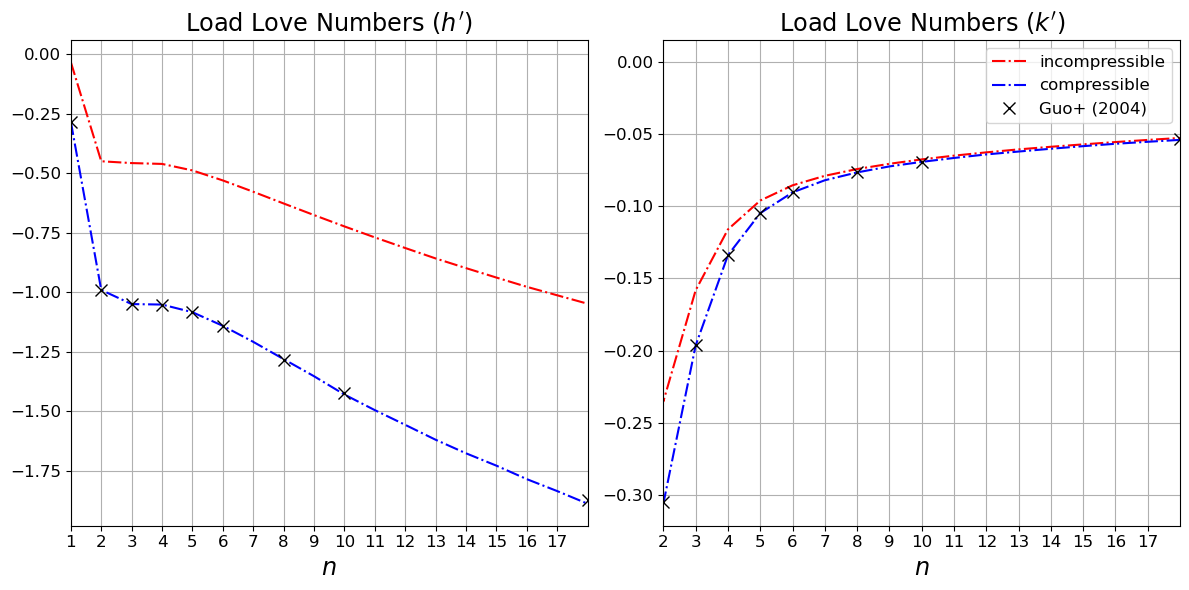

In [3]:
forcing_frequency = 2. * np.pi / (24 * 60 * 60)

N = 10

radius_array = np.ones((len(r)-1)*N)
shear_array = np.ones((len(r)-1)*N)
viscosity_array = np.ones((len(r)-1)*N)
bulk_mod_array = np.ones((len(r)-1)*N)
density_array = np.ones((len(r)-1)*N)

for i in range(0,len(r)-1):
    radius_array[i*N:(i+1)*N] = np.linspace(r[i],r[i+1],N)
    shear_array[i*N:(i+1)*N] = np.linspace(mu[i],mu[i+1],N)
    viscosity_array[i*N:(i+1)*N] = np.linspace(eta[i],eta[i+1],N)
    bulk_mod_array[i*N:(i+1)*N] = np.linspace(K[i],K[i+1],N)
    density_array[i*N:(i+1)*N] = np.linspace(rho[i],rho[i+1],N)


volume_array, mass_array, gravity_array = \
    calculate_mass_gravity_arrays(radius_array, density_array)


# Purely Elastic Body
from TidalPy.rheology import Elastic

elastic_rheology = Elastic()
# Calculate the "complex" shear (really all Im[mu] = 0)
complex_shear = np.empty(radius_array.shape, dtype=np.complex128)
shear_array = np.ascontiguousarray(shear_array)
viscosity_array = np.ascontiguousarray(viscosity_array)
elastic_rheology.vectorize_modulus_viscosity(forcing_frequency, shear_array, viscosity_array, complex_shear)


nmax=18

degs = np.arange(1,nmax+1)
kp_i = np.zeros(nmax)
hp_i = np.zeros(nmax)
kl_i = np.zeros(nmax)
hl_i = np.zeros(nmax)

kp_c = np.zeros(nmax)
hp_c = np.zeros(nmax)
kl_c = np.zeros(nmax)
hl_c = np.zeros(nmax)


for i in range(1,nmax+1):
    radial_solution = \
        radial_solver(
            radius_array,
            density_array,
            gravity_array,
            bulk_mod_array,
            complex_shear,
            forcing_frequency,
            planet_bulk_density,
            layer_types=("liquid","solid","solid"),
            is_static_by_layer=(True,False,False),
            is_incompressible_by_layer=(True,True,True),
            upper_radius_by_layer=(3473E3,4500E3, 6371E3),
            degree_l=i,
            solve_for=('tidal','loading'),
            use_kamata=True,
            integration_method='DOP853',
            integration_rtol = 1.0e-6,
            integration_atol = 1.0e-6,
            scale_rtols_by_layer_type = False,
            max_num_steps = 10_000_000,
            expected_size = 1000,
            max_ram_MB = 1000,
            max_step = 0,
            limit_solution_to_radius = True,
            nondimensionalize = True,
            verbose = False,
            raise_on_fail = True
            )

    if i==1:
        kp_i[i-1] = radial_solution.k[0]-radial_solution.k[0]
        hp_i[i-1] = radial_solution.h[0]-radial_solution.k[0]
        kl_i[i-1] = radial_solution.k[1]-radial_solution.k[1]
        hl_i[i-1] = radial_solution.h[1]-radial_solution.k[1]
    else:
        kp_i[i-1] = radial_solution.k[0]
        hp_i[i-1] = radial_solution.h[0]
        kl_i[i-1] = radial_solution.k[1]
        hl_i[i-1] = radial_solution.h[1]
    
    radial_solution = \
        radial_solver(
            radius_array,
            density_array,
            gravity_array,
            bulk_mod_array,
            complex_shear,
            forcing_frequency,
            planet_bulk_density,
            layer_types=("liquid","solid","solid"),
            is_static_by_layer=(True,False,False),
            is_incompressible_by_layer=(False, False, False),
            upper_radius_by_layer=(3473E3,4500E3, 6371E3),
            degree_l=i,
            solve_for=('tidal','loading'),
            use_kamata=True,
            integration_method='DOP853',
            integration_rtol = 1.0e-6,
            integration_atol = 1.0e-6,
            scale_rtols_by_layer_type = False,
            max_num_steps = 10_000_000,
            expected_size = 1000,
            max_ram_MB = 1000,
            max_step = 500,
            limit_solution_to_radius = True,
            nondimensionalize = True,
            verbose = False,
            raise_on_fail = True
            )

    if i==1:
        kp_c[i-1] = radial_solution.k[0]-radial_solution.k[0]
        hp_c[i-1] = radial_solution.h[0]-radial_solution.k[0]
        kl_c[i-1] = radial_solution.k[1]-radial_solution.k[1]
        hl_c[i-1] = radial_solution.h[1]-radial_solution.k[1]
    else:
        kp_c[i-1] = radial_solution.k[0]
        hp_c[i-1] = radial_solution.h[0]
        kl_c[i-1] = radial_solution.k[1]
        hl_c[i-1] = radial_solution.h[1]
    
    print(i)


guo_n = np.array([1, 2, 3, 4, 5, 6, 8, 10, 18])
guo_h = -np.array([0.2856, 0.9909, 1.0501, 1.0528, 1.0857, 1.1433, 1.2833, 1.4226, 1.8733])
guo_kn = -np.array([0, 0.6103, 0.5876, 0.5341, 0.5228, 0.5411, 0.61107, 0.6893, 0.961])

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(degs,hl_i,'-.',label="incompressible",ms=8,color='red')
plt.plot(degs,hl_c,'-.',label="compressible",ms=8,color='blue')
plt.plot(guo_n,guo_h,'x',label="Guo+ (2004)",ms=8,color='black')
plt.xticks(np.arange(0, nmax,1))
plt.xlim([1,nmax])
plt.tick_params(labelsize='large')
plt.title('Load Love Numbers $(h^\prime)$',fontsize = 'xx-large')
plt.xlabel(r'$n$',fontsize='xx-large')
plt.grid()

plt.subplot(1,2,2)
plt.plot(degs,kl_i,'-.',label="incompressible",ms=8,color='red')
plt.plot(degs,kl_c,'-.',label="compressible",ms=8,color='blue')
plt.plot(guo_n,guo_kn/guo_n,'x',label="Guo+ (2004)",ms=8,color='black')

plt.xticks(np.arange(0, nmax,1))
plt.xlim([2,nmax])
plt.tick_params(labelsize='large')

plt.legend(loc='best',fontsize='12',ncol=1)
plt.title('Load Love Numbers $(k^\prime)$',fontsize = 'xx-large')
plt.xlabel(r'$n$',fontsize='xx-large')
plt.grid()
plt.tight_layout()
plt.show()
    

In [4]:
# now lets do an older model, from Farrell (1972) using the Gutenberg Earth model of Alterman+ 1961

r = np.array([0, 19, 38, 50, 60, 70, 80, 90, 100, 125, 150, 175, 200, 225,
              250, 300, 350, 400, 450, 500, 600, 700, 800, 900, 1000, 1200,
              1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 2898, 3000,
              3500, 4000, 4500, 4982, 5121, 6370])


rho = np.array([2.74, 3.00, 3.32, 3.34, 3.35, 3.36, 3.37, 3.38, 3.39, 3.41,
                3.43, 3.46, 3.48, 3.50, 3.53, 3.58, 3.62, 3.69, 3.82, 4.01,
                4.21, 4.40, 4.56, 4.63, 4.74, 4.85, 4.96, 5.07, 5.19, 5.29,
                5.39, 5.49, 5.59, 5.69, 9.40, 9.55, 10.15, 10.7, 11.2, 11.5,
                12.0, 12.3])

vp = np.array([6.14, 6.58, 8.20, 8.17, 8.14, 8.10, 8.07, 8.02, 7.93, 7.85, 
               7.89, 7.98, 8.10, 8.21, 8.38, 8.62, 8.87, 9.15, 9.45, 9.88, 
               10.30, 10.71, 11.10, 11.35, 11.60, 11.93, 12.17, 12.43, 12.67,
               12.90, 13.10, 13.32, 13.59, 13.70, 8.10, 8.23, 8.90, 9.50, 
               9.97, 10.44, 10.75, 11.31])

vs = np.array([3.55, 3.80, 4.65, 4.62, 4.57, 4.51, 4.46, 4.41, 4.37, 4.35, 
               4.36, 4.38, 4.42, 4.46, 4.45, 4.68, 4.85, 5.04, 5.21, 5.45, 
               5.76, 6.03, 6.23, 6.32, 6.42, 6.55, 6.69, 6.80, 6.90, 6.97, 
               7.05, 7.15, 7.23, 7.20, 0., 0., 0., 0., 0., 0., 0., 0.])


if (r[0] < r[-1]):
    print(":: Reversing model to start from core")
    r = r[::-1]
    vp = vp[::-1]
    vs = vs[::-1]
    rho = rho[::-1]
r = 6371-r

r = np.multiply(r,1000.)
vp = np.multiply(vp,1000.)
vs = np.multiply(vs,1000.)
rho = np.multiply(rho,1000.)

# Convert Seismic Velocities to Elastic Moduli
mu = np.multiply(np.square(vs),rho)
K  = np.subtract(np.multiply(np.square(vp),rho),mu*(4./3.))
lam = np.subtract(K, mu*(2./3.))

visc = 1E30
eta   = np.full(len(mu),visc)


:: Reversing model to start from core


/var/folders/3t/v1hqyg7n1mx49w8wk2wn_8w00000gn/T/ipykernel_1241/326768609.py:81: ComplexWarning: Casting complex values to real discards the imaginary part
  kp_i[i-1] = radial_solution.k[0]-radial_solution.k[0]
/var/folders/3t/v1hqyg7n1mx49w8wk2wn_8w00000gn/T/ipykernel_1241/326768609.py:82: ComplexWarning: Casting complex values to real discards the imaginary part
  hp_i[i-1] = radial_solution.h[0]-radial_solution.k[0]
/var/folders/3t/v1hqyg7n1mx49w8wk2wn_8w00000gn/T/ipykernel_1241/326768609.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  kl_i[i-1] = radial_solution.k[1]-radial_solution.k[1]
/var/folders/3t/v1hqyg7n1mx49w8wk2wn_8w00000gn/T/ipykernel_1241/326768609.py:84: ComplexWarning: Casting complex values to real discards the imaginary part
  hl_i[i-1] = radial_solution.h[1]-radial_solution.k[1]
/var/folders/3t/v1hqyg7n1mx49w8wk2wn_8w00000gn/T/ipykernel_1241/326768609.py:122: ComplexWarning: Casting complex values to real discards the imaginary 

1


/var/folders/3t/v1hqyg7n1mx49w8wk2wn_8w00000gn/T/ipykernel_1241/326768609.py:86: ComplexWarning: Casting complex values to real discards the imaginary part
  kp_i[i-1] = radial_solution.k[0]
/var/folders/3t/v1hqyg7n1mx49w8wk2wn_8w00000gn/T/ipykernel_1241/326768609.py:87: ComplexWarning: Casting complex values to real discards the imaginary part
  hp_i[i-1] = radial_solution.h[0]
/var/folders/3t/v1hqyg7n1mx49w8wk2wn_8w00000gn/T/ipykernel_1241/326768609.py:88: ComplexWarning: Casting complex values to real discards the imaginary part
  kl_i[i-1] = radial_solution.k[1]
/var/folders/3t/v1hqyg7n1mx49w8wk2wn_8w00000gn/T/ipykernel_1241/326768609.py:89: ComplexWarning: Casting complex values to real discards the imaginary part
  hl_i[i-1] = radial_solution.h[1]
/var/folders/3t/v1hqyg7n1mx49w8wk2wn_8w00000gn/T/ipykernel_1241/326768609.py:127: ComplexWarning: Casting complex values to real discards the imaginary part
  kp_c[i-1] = radial_solution.k[0]
/var/folders/3t/v1hqyg7n1mx49w8wk2wn_8w00000

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


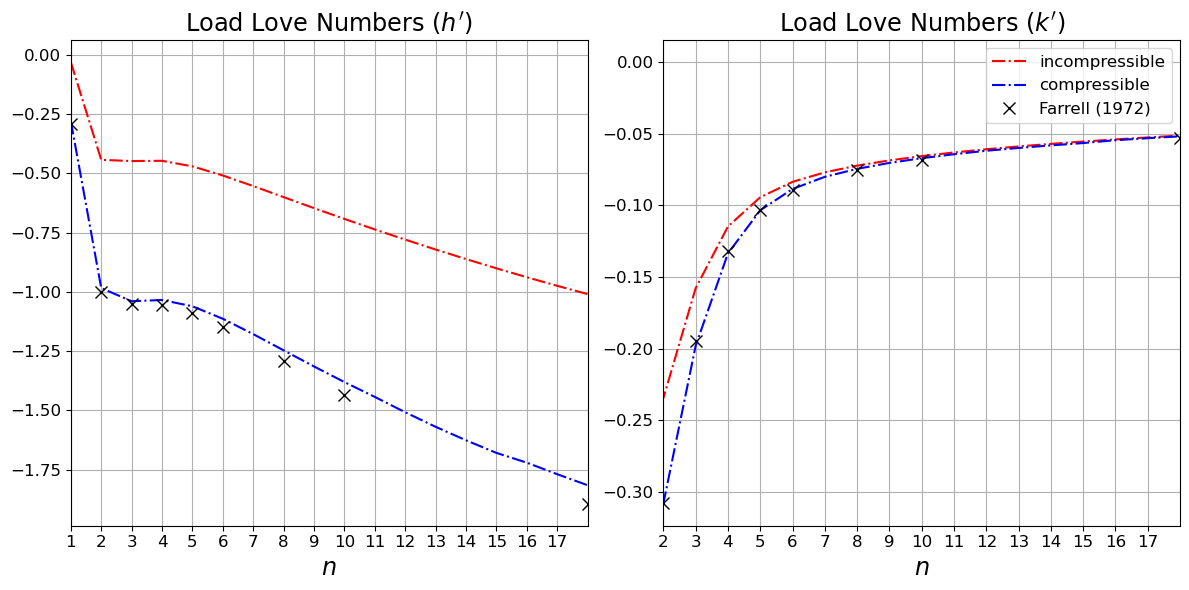

In [5]:
forcing_frequency = 2. * np.pi / (24 * 60 * 60)  # Phobos orbital freq

N = 1000

radius_array = np.ones((len(r)-1)*N)
shear_array = np.ones((len(r)-1)*N)
viscosity_array = np.ones((len(r)-1)*N)
bulk_mod_array = np.ones((len(r)-1)*N)
density_array = np.ones((len(r)-1)*N)

for i in range(0,len(r)-1):
    radius_array[i*N:(i+1)*N] = np.linspace(r[i],r[i+1],N)
    shear_array[i*N:(i+1)*N] = np.linspace(mu[i],mu[i+1],N)
    viscosity_array[i*N:(i+1)*N] = np.linspace(eta[i],eta[i+1],N)
    bulk_mod_array[i*N:(i+1)*N] = np.linspace(K[i],K[i+1],N)
    density_array[i*N:(i+1)*N] = np.linspace(rho[i],rho[i+1],N)

volume_array, mass_array, gravity_array = \
    calculate_mass_gravity_arrays(radius_array, density_array)
    

    
# Purely Elastic Body
from TidalPy.rheology import Elastic

elastic_rheology = Elastic()
# Calculate the "complex" shear (really all Im[mu] = 0)
complex_shear = np.empty(radius_array.shape, dtype=np.complex128)
shear_array = np.ascontiguousarray(shear_array)
viscosity_array = np.ascontiguousarray(viscosity_array)
elastic_rheology.vectorize_modulus_viscosity(forcing_frequency, shear_array, viscosity_array, complex_shear)


nmax=18

degs = np.arange(1,nmax+1)
kp_i = np.zeros(nmax)
hp_i = np.zeros(nmax)
kl_i = np.zeros(nmax)
hl_i = np.zeros(nmax)

kp_c = np.zeros(nmax)
hp_c = np.zeros(nmax)
kl_c = np.zeros(nmax)
hl_c = np.zeros(nmax)



for i in range(1,nmax+1):
    radial_solution = \
        radial_solver(
            radius_array,
            density_array,
            gravity_array,
            bulk_mod_array,
            complex_shear,
            forcing_frequency,
            planet_bulk_density,
            layer_types=("liquid","solid","solid"),
            is_static_by_layer=(True,False,False),
            is_incompressible_by_layer=(True,True,True),
            upper_radius_by_layer=(3473E3,4500E3, 6371E3),
            degree_l=i,
            solve_for=('tidal','loading'),
            use_kamata=True,
            integration_method='DOP853',
            integration_rtol = 1.0e-9,
            integration_atol = 1.0e-9,
            scale_rtols_by_layer_type = False,
            max_num_steps = 10_000_000,
            expected_size = 1000,
            max_ram_MB = 1000,
            max_step = 0,
            limit_solution_to_radius = True,
            nondimensionalize = True,
            verbose = False,
            raise_on_fail = True
            )

    if i==1:
        kp_i[i-1] = radial_solution.k[0]-radial_solution.k[0]
        hp_i[i-1] = radial_solution.h[0]-radial_solution.k[0]
        kl_i[i-1] = radial_solution.k[1]-radial_solution.k[1]
        hl_i[i-1] = radial_solution.h[1]-radial_solution.k[1]
    else:
        kp_i[i-1] = radial_solution.k[0]
        hp_i[i-1] = radial_solution.h[0]
        kl_i[i-1] = radial_solution.k[1]
        hl_i[i-1] = radial_solution.h[1]
    
    radial_solution = \
        radial_solver(
            radius_array,
            density_array,
            gravity_array,
            bulk_mod_array,
            complex_shear,
            forcing_frequency,
            planet_bulk_density,
            layer_types=("liquid","solid","solid"),
            is_static_by_layer=(True,False,False),
            is_incompressible_by_layer=(False, False, False),
            upper_radius_by_layer=(3473E3,4500E3, 6371E3),
            degree_l=i,
            solve_for=('tidal','loading'),
            use_kamata=True,
            integration_method='DOP853',
            integration_rtol = 1.0e-9,
            integration_atol = 1.0e-9,
            scale_rtols_by_layer_type = False,
            max_num_steps = 10_000_000,
            expected_size = 1000,
            max_ram_MB = 1000,
            max_step = 500,
            limit_solution_to_radius = True,
            nondimensionalize = True,
            verbose = False,
            raise_on_fail = True
            )

    if i==1:
        kp_c[i-1] = radial_solution.k[0]-radial_solution.k[0]
        hp_c[i-1] = radial_solution.h[0]-radial_solution.k[0]
        kl_c[i-1] = radial_solution.k[1]-radial_solution.k[1]
        hl_c[i-1] = radial_solution.h[1]-radial_solution.k[1]
    else:
        kp_c[i-1] = radial_solution.k[0]
        hp_c[i-1] = radial_solution.h[0]
        kl_c[i-1] = radial_solution.k[1]
        hl_c[i-1] = radial_solution.h[1]
    
    print(i)


alt_n = np.array([1, 2, 3, 4, 5, 6, 8, 10, 18])
alt_h = -np.array([0.29, 1.001, 1.052, 1.053, 1.088, 1.147, 1.291, 1.433, 1.893])
alt_kn = -np.array([0, 0.615, 0.585, 0.528, 0.516, 0.535, 0.604, 0.682, 0.952])

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)

# n1 = np.arange(0,11)
plt.plot(degs,hl_i,'-.',label="incompressible",ms=8,color='red')
plt.plot(degs,hl_c,'-.',label="compressible",ms=8,color='blue')
plt.plot(alt_n,alt_h,'x',label="Farrell (1972)",ms=8,color='black')
plt.xticks(np.arange(0, nmax,1))
plt.xlim([1,nmax])
plt.tick_params(labelsize='large')
plt.title('Load Love Numbers $(h^\prime)$',fontsize = 'xx-large')
plt.xlabel(r'$n$',fontsize='xx-large')
plt.grid()



# Plot
plt.subplot(1,2,2)
plt.plot(degs,kl_i,'-.',label="incompressible",ms=8,color='red')
plt.plot(degs,kl_c,'-.',label="compressible",ms=8,color='blue')
plt.plot(alt_n,alt_kn/alt_n,'x',label="Farrell (1972)",ms=8,color='black')
plt.xticks(np.arange(0, nmax,1))
plt.xlim([2,nmax])
plt.tick_params(labelsize='large')
plt.legend(loc='best',fontsize='12',ncol=1)
plt.title('Load Love Numbers $(k^\prime)$',fontsize = 'xx-large')
plt.xlabel(r'$n$',fontsize='xx-large')
plt.grid()
plt.tight_layout()

plt.show()
 